# Project description
## Identifying patterns that determine the success of games

You work for the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. You need to identify patterns that determine whether a game succeeds or not. This will allow you to spot potential big winners and plan advertising campaigns.
<br>In front of you is data going back to 2016. Let’s imagine that it’s December 2016 and you’re planning a campaign for 2017.
<br>(The important thing is to get experience working with data. It doesn't really matter whether you're forecasting 2017 sales based on data from 2016 or 2017 sales based on data from 2016.)
<br>The dataset contains the abbreviation ESRB. The Entertainment Software Rating Board evaluates a game's content and assigns an age rating such as Teen or Mature.

# Data description
- Name
- Platform
- Year_of_Release
- Genre
- NA_sales (North American sales in USD million)
- EU_sales (sales in Europe in USD million)
- JP_sales (sales in Japan in USD million)
- Other_sales (sales in other countries in USD million)
- Critic_Score (maximum of 100)
- User_Score (maximum of 10)
- Rating (ESRB)

Data for 2016 may be incomplete.

## Open the data file and study the general information. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns
import numpy as np

from scipy import stats
rng = np.random.default_rng()

In [2]:
games = pd.read_csv('/datasets/games.csv')

In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
games.duplicated().sum()

0

In [6]:
display(games.isna().sum()*100/len(games))
display(pd.DataFrame(round((games.isna().mean()*100),2)).style.background_gradient('coolwarm'))
games.isna().mean() * 100

Name                0.011965
Platform            0.000000
Year_of_Release     1.609333
Genre               0.011965
NA_sales            0.000000
EU_sales            0.000000
JP_sales            0.000000
Other_sales         0.000000
Critic_Score       51.319174
User_Score         40.089740
Rating             40.478612
dtype: float64

,0
Name,0.010000
Platform,0.000000
Year_of_Release,1.610000
Genre,0.010000
NA_sales,0.000000
EU_sales,0.000000
JP_sales,0.000000
Other_sales,0.000000
Critic_Score,51.320000
User_Score,40.090000


Name                0.011965
Platform            0.000000
Year_of_Release     1.609333
Genre               0.011965
NA_sales            0.000000
EU_sales            0.000000
JP_sales            0.000000
Other_sales         0.000000
Critic_Score       51.319174
User_Score         40.089740
Rating             40.478612
dtype: float64

### Conclusion

- There are missing values in the 'Name', 'Year_of_Release', 'Genre', 'Critic_Score', 'User_Score' and 'Rating' columns.
- In "Year_of_Release" they are of type float64, for convenience it is better to correct it to integers because this is the year the game was released.
- There are no duplicates in the date.
- In ’User_Score’ are of type object, it is better to correct it to float for convenience.

## Data preprocessing.

*Replace the column names (make them lowercase).*

In [7]:
games.columns = games.columns.str.lower() 
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [8]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


*Convert the data to the required types.*

In [9]:
games['year_of_release'] = games['year_of_release'].astype('Int64', errors = 'ignore')

In [10]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.4+ MB


In [11]:
games['user_score'].unique()
#All values are numeric except 'tbd'

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [12]:
games.loc[games['user_score'] == 'tbd']['user_score'].count()
#I counted the number of 'tbd' values.

2424

In [13]:
games['user_score'] = games['user_score'].replace('tbd', np.nan)
#Googling I found out that 'tbd' is 'To Be Determined', it is usually used when the release date of the game 
#is not known, in this case I assume that 'user_score' is not known. So I replaced 'tbd' with nan. 

In [14]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [15]:
games['user_score'] = games['user_score'].astype('float')
#Now the type of the 'user_score' column can be changed from an object to a float.

In [16]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


In [17]:
games['name'].isnull().sum()

2

In [18]:
games.loc[games['name'].isnull()]

#The main meaning of 'name' is missing and the game was released in 1993, the data will not be recovered 
#and it is only 0.012% of the total date. These lines can be deleted and at the same time the missing values 
#in the 'genre' column will go away.

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [19]:
games = games.dropna(subset=['name'])

In [20]:
games['name'].isnull().sum()

0

In [21]:
games['genre'].isnull().sum()

0

In [22]:
games['year_of_release'].isnull().sum()

269

In [23]:
games['year_of_release'].unique()

<IntegerArray>
[2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010, 2013, 2004,
 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014, 1992, 1997, 1993, 1994,
 1982, 2016, 2003, 1986, 2000, <NA>, 1995, 1991, 1981, 1987, 1980, 1983]
Length: 38, dtype: Int64

In [24]:
games.loc[games['year_of_release'].isnull()].sample(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
6773,Mega Man X Collection,PS2,<NA>,Misc,0.12,0.09,0.00,0.03,73.0,8.8,E
10993,The Daring Game for Girls,Wii,<NA>,Adventure,0.09,0.00,0.00,0.01,NaN,NaN,E
9703,Record of Agarest War Zero,PS3,<NA>,Strategy,0.09,0.00,0.03,0.01,50.0,6.7,T
15953,PDC World Championship Darts 2008,DS,<NA>,Sports,0.01,0.00,0.00,0.00,NaN,NaN,NaN
15081,Wii de Asobu: Metroid Prime,Wii,<NA>,Shooter,0.00,0.00,0.02,0.00,NaN,NaN,NaN
1142,Rock Band,PS3,<NA>,Misc,0.99,0.41,0.00,0.22,92.0,8.4,T
2572,PES 2009: Pro Evolution Soccer,PSP,<NA>,Sports,0.04,0.33,0.26,0.17,NaN,NaN,NaN
2492,MLB SlugFest 20-03,PS2,<NA>,Sports,0.41,0.32,0.00,0.11,77.0,8.2,E
5932,Shrek the Third,DS,<NA>,Action,0.26,0.01,0.00,0.02,70.0,6.5,E
4132,Karate,2600,<NA>,Fighting,0.44,0.03,0.00,0.00,NaN,NaN,NaN


In [25]:
print("Percentage of missing values in the 'year_of_release' column: {:.2f}"
      .format(games['year_of_release'].isna().sum()*100/len(games)))
#1.61% is a very small percentage, we can delete it without affecting the date, unfortunately 
#it is difficult to recover this data and most of the games were released a long time ago.

Percentage of missing values in the 'year_of_release' column: 1.61


In [26]:
games = games.dropna(subset=['year_of_release'])

In [27]:
games['year_of_release'].isnull().sum()

0

In [28]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


In [29]:
games['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [30]:
games['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [31]:
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [32]:
games.loc[games['rating'].isna(), 'rating'] = 'unknown'

In [33]:
games['rating'].value_counts()

unknown    6676
E          3921
T          2905
M          1536
E10+       1393
EC            8
K-A           3
AO            1
RP            1
Name: rating, dtype: int64

**More than half of the values are missing in the columns 'critic_score', 'user_score' and 'rating', it is impossible to simply delete them without losing data. It is also not possible to replace the value with the average or the median, because this is the rating of the games, which depends on many factors. 
<br>I assume that in this case either the games are old and the rating was not included in the date or the rating was not formed.**

*Calculate the total sales (the sum of sales in all regions) for each game and put these values in a separate column.*
 

In [34]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


### Conclusion

- Column names have been replaced (make them lowercase).
- Columns 'year_of_release' and 'user_score' have been converted to the required types ('year_of_release' from float to Int and 'user_score' from object to float).
- Removed missing values in the 'name' column. It was only 2 games released in 1993.
- Removed missing values in the 'year_of_release' column. It was 1.61% of the total date, which is not critical.
- Replaced 'tbd' with nan.
- Created column 'total_sales' with the sum of sales in all regions.
 

## Analyze the data.

*Look at how many games were released in different years. Is the data for every period significant?*
 

In [35]:
games.query('name != "not_stated"').pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count')

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


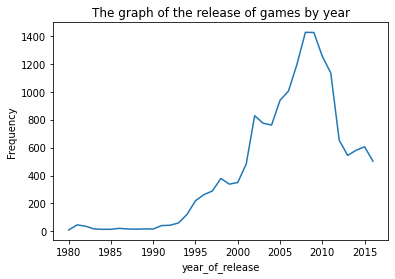

In [36]:
games.groupby(['year_of_release'])['name'].count().plot()
plt.title('The graph of the release of games by year')
plt.ylabel('Frequency')
plt.show ()

#The graph shows that there were almost no games until 1993. 
#Therefore, the data from 1985 to 1993 is not so important for the assessment. 
#Then there was a sharp jump until 2009 and then began to decline.

*Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each year. Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?*

In [37]:
games['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

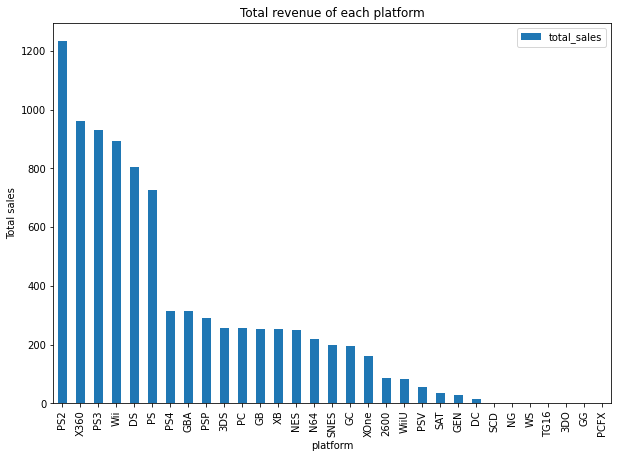

In [38]:
games.pivot_table(index='platform',values=['total_sales'],aggfunc=('sum')).sort_values(by='total_sales',ascending=False).plot(kind='bar', figsize=(10,7))
plt.title('Total revenue of each platform')
plt.ylabel('Total sales')
plt.show ()

#Seen from this graph that the top revenue is from the PS2, X360, PS3, Wii, DS, PS platforms.

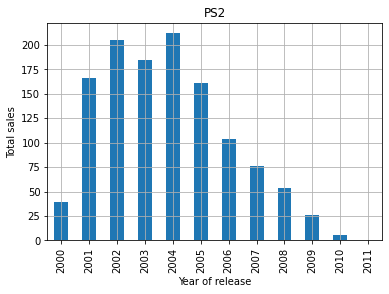

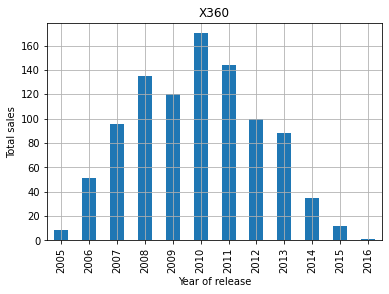

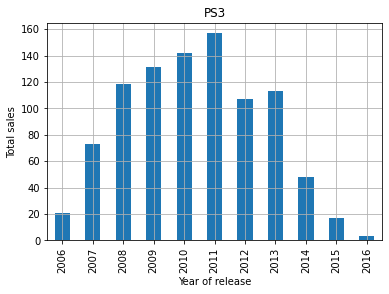

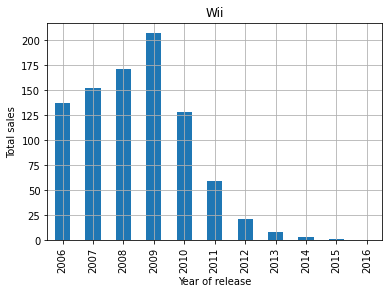

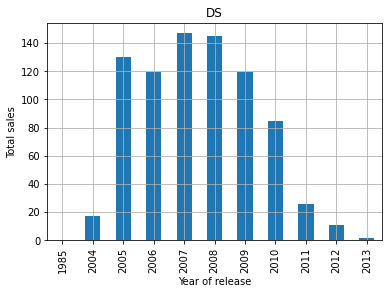

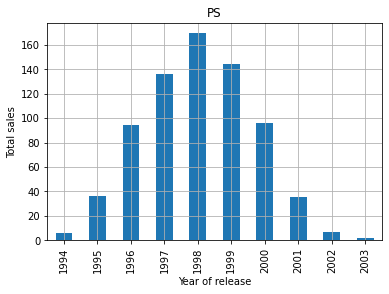

In [39]:
top_sales_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

for top_platform in top_sales_platforms:
    games.query('platform == @top_platform').groupby('year_of_release')['total_sales'].sum().plot(kind='bar', grid=True)
    plt.xlabel('Year of release')
    plt.ylabel('Total sales')
    plt.title(top_platform)
    plt.show()

The graphs show that the average lifespan of a platform is 10-12 years. Usually platforms take 1-2 years to become popular. Around the middle of their lives, a new platform appears (this is in 5-6 years) and the popularity goes away.



In [40]:
games.loc[games['year_of_release'] <= 1993]

#During the period from 1980 to 1993, less than 100 games were released per year, which is a small number 
#in comparison with other years. I decided to remove this period from the sample, since it is not fair to compare 
#the years if each of them has such different samples in terms of the number of samples.
#During this period, a total of 365 games were released.

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,unknown,30.26
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,unknown,28.31
18,Super Mario World,SNES,1990,Platform,12.78,3.75,3.54,0.55,NaN,NaN,unknown,20.62
21,Super Mario Land,GB,1989,Platform,10.83,2.71,4.18,0.42,NaN,NaN,unknown,18.14
...,...,...,...,...,...,...,...,...,...,...,...,...
14610,Doom,PC,1992,Shooter,0.02,0.00,0.00,0.00,85.0,8.2,M,0.02
14621,SimCity,PC,1988,Simulation,0.00,0.02,0.00,0.01,64.0,2.2,E10+,0.03
15692,Empire Deluxe,PC,1992,Strategy,0.02,0.00,0.00,0.00,NaN,NaN,unknown,0.02
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.00,0.00,0.02,0.00,NaN,NaN,unknown,0.02


In [41]:
games = games.loc[games['year_of_release'] > 1993]

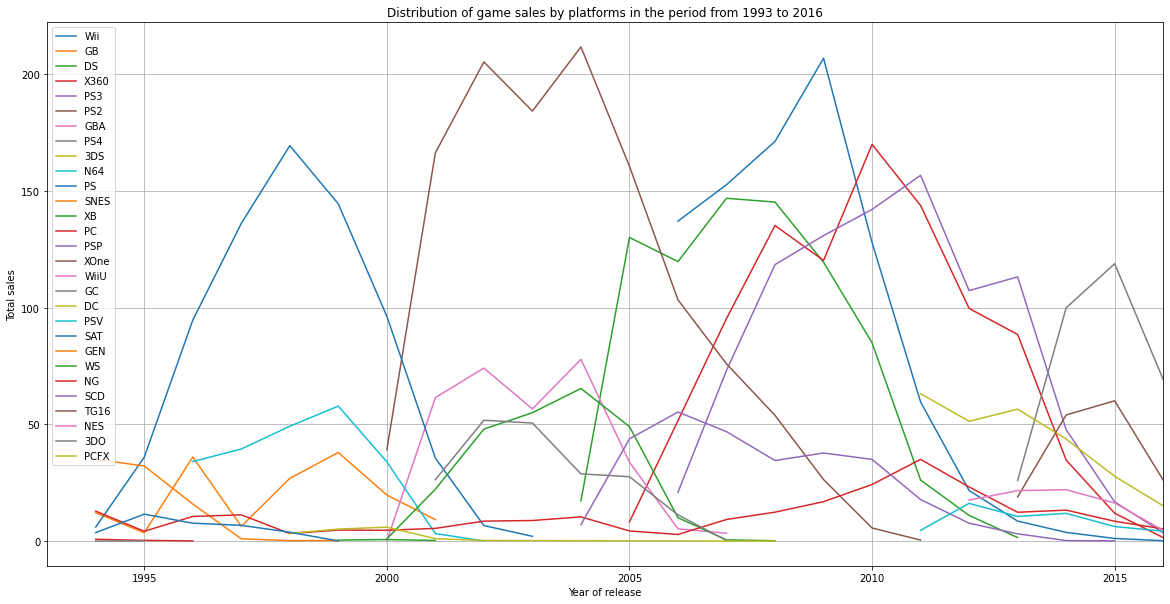

In [42]:
platforms_1993_2016 = games.query('year_of_release>=1993 and year_of_release<=2016')['platform'].unique()

for curr_platform in platforms_1993_2016:
    (
    games.query('platform == @curr_platform'). 
    groupby('year_of_release')['total_sales'].
    sum().
    plot(grid=True, figsize = (20,10))
    )
plt.xlim(1993, 2016)
plt.xlabel('Year of release')
plt.ylabel('Total sales')
plt.title('Distribution of game sales by platforms in the period from 1993 to 2016')
plt.legend(platforms_1993_2016)
plt.show()

#Judging by the histogram, approximately the period from 2011-2013 begins to live new platforms, in which the life 
#cycle is just beginning (they may or may not take off), and also there are at the peak of several popular platforms,
#which are gradually beginning to lose their popularity by 2016 already most likely almost out of demand.

- *Determine what period you should take data for. To do so, look at your answers to the previous questions. The data should allow you to build a prognosis for 2017.*
- *Work only with the data that you've decided is relevant. Disregard the data for previous years.*
- *Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.*



In [43]:
games['platform'].unique()

array(['Wii', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'GBA', 'PS4', '3DS',
       'N64', 'PS', 'SNES', 'XB', 'PC', 'PSP', 'XOne', 'WiiU', 'GC', 'DC',
       'PSV', 'SAT', 'GEN', 'WS', 'NG', 'SCD', 'TG16', 'NES', '3DO',
       'PCFX'], dtype=object)

In [44]:
games.query('year_of_release>=2013 and year_of_release<=2016')['platform'].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'XOne', 'WiiU', 'Wii', 'PC', 'PSV',
       'DS', 'PSP'], dtype=object)

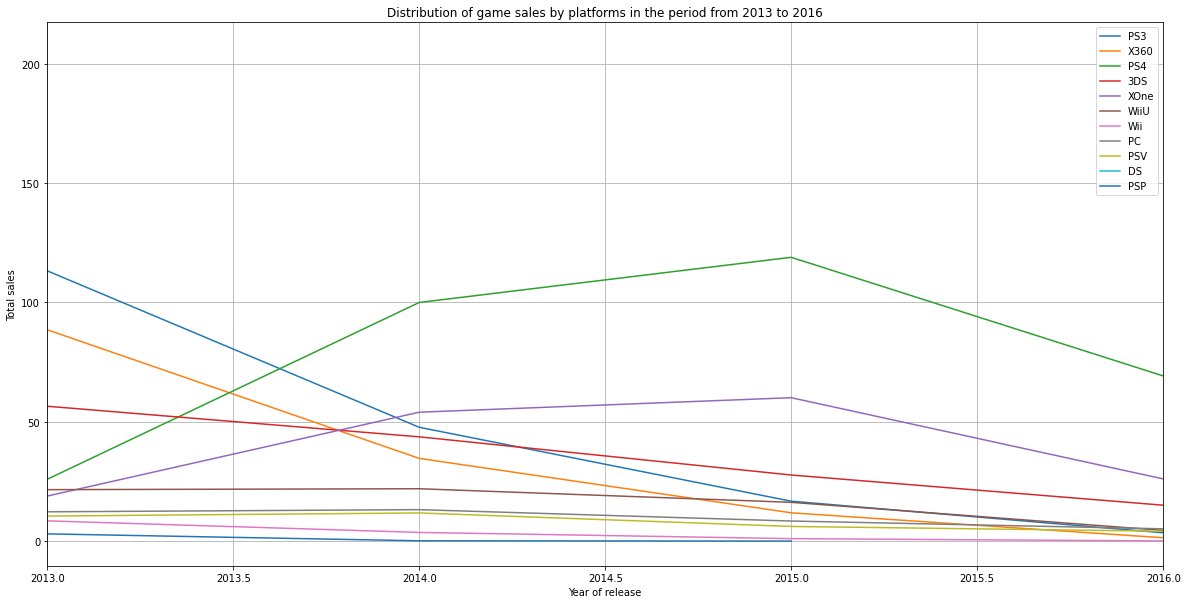

In [45]:
platforms_2013_2016 = games.query('year_of_release>=2013 and year_of_release<=2016')['platform'].unique()

for curr_platform in platforms_2013_2016:
    (
    games.query('platform == @curr_platform'). 
    groupby('year_of_release')['total_sales'].
    sum().
    plot(grid=True, figsize = (20,10))
    )
plt.xlim(2013, 2016)
plt.xlabel('Year of release')
plt.ylabel('Total sales')
plt.title('Distribution of game sales by platforms in the period from 2013 to 2016')
plt.legend(platforms_2013_2016)
plt.show()

#For build a prognosis for 2017, it is not relevant for us to take a period in which the platforms popular 
#in the last few years have not even appeared, proceeding from the previous histogram for the period 1993-2016, 
#we need to take the current period from 2013 to 2016.

It can be seen from the graphs that almost all platforms follow approximately the same cycle: they appear on the market, become popular for about 2 years, then gradually reach their peak, after which they lose popularity. Most likely due to the release of a new platform on the market. The entire life cycle takes about 10 years.
It can be seen from the graphs that by 2014-2015, all platforms are declining, except for PS4 and XOne, they are still holding a good level of sales. Both platforms hit the market in 2013.
Since the data for 2016 may not be complete, can see a slight drop in the graphs. But given that the average life cycle of a platform is about 10 years, these 2 platforms can be potentially profitable for about 3-4 more years (if look at the development of other platforms), after which they will also begin to gradually reduce their popularity.
That is, for 2017-2019, can count on their potential profitability.



*Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings.*


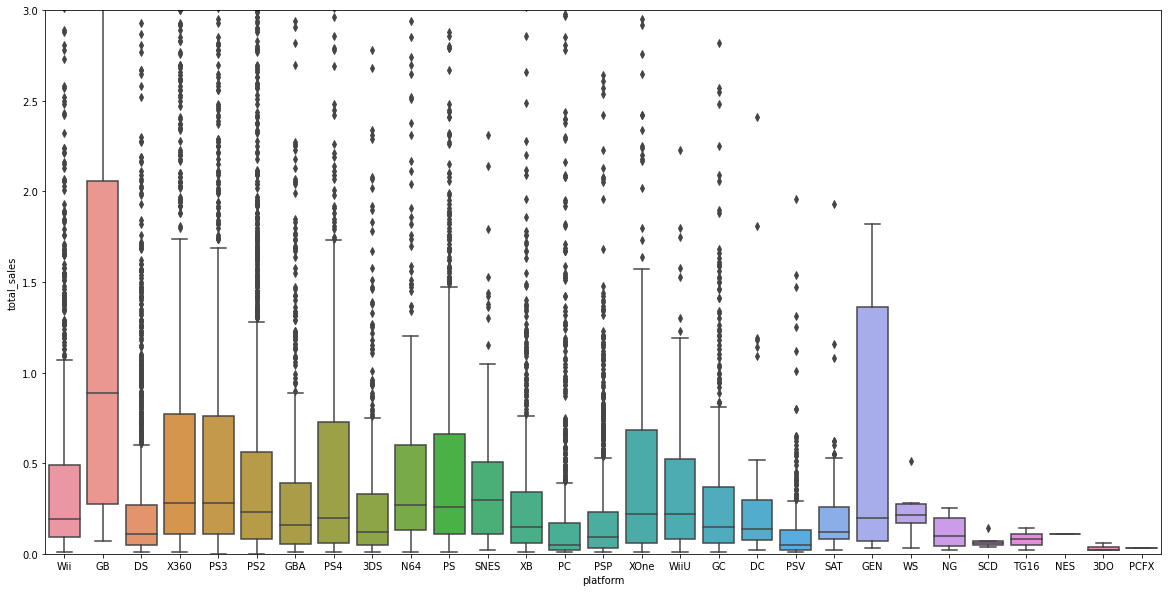

In [46]:
plt.figure(figsize=(20,10))
plt.ylim(0,3)
sns.boxplot(x='platform', y='total_sales', data=games)
plt.show()

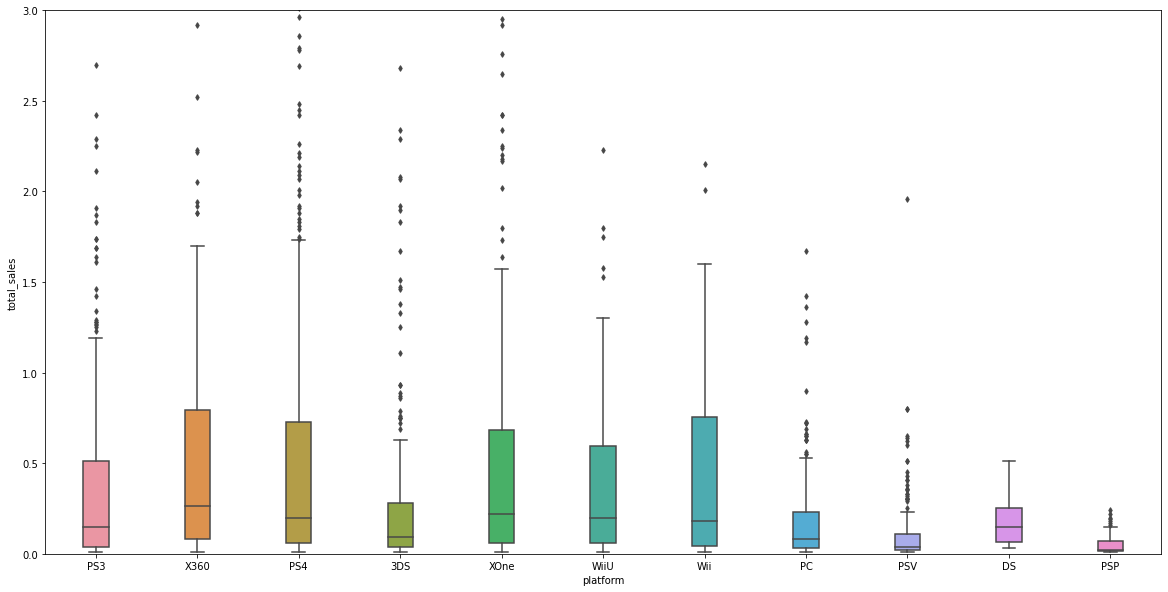

In [47]:
games_in_period = games.loc[(games['year_of_release'] >= 2013) & (games['year_of_release'] <= 2016)]

plt.figure(figsize=(20,10))
platforms_boxplot = sns.boxplot(x = 'platform',
                                y = 'total_sales',
                                data = games_in_period,
                                fliersize = 4,
                                width = 0.25)
plt.ylim(0,3)
plt.show()

In [48]:
#profitable_platforms = games.loc[(games['platform'] == 'PS4') | (games['platform'] == 'XOne')]

#plt.figure(figsize=(20,10))
#sns.boxplot(x = 'platform', y = 'total_sales',data = profitable_platforms, width = 0.25)
#plt.ylim(0,3)
#plt.show()

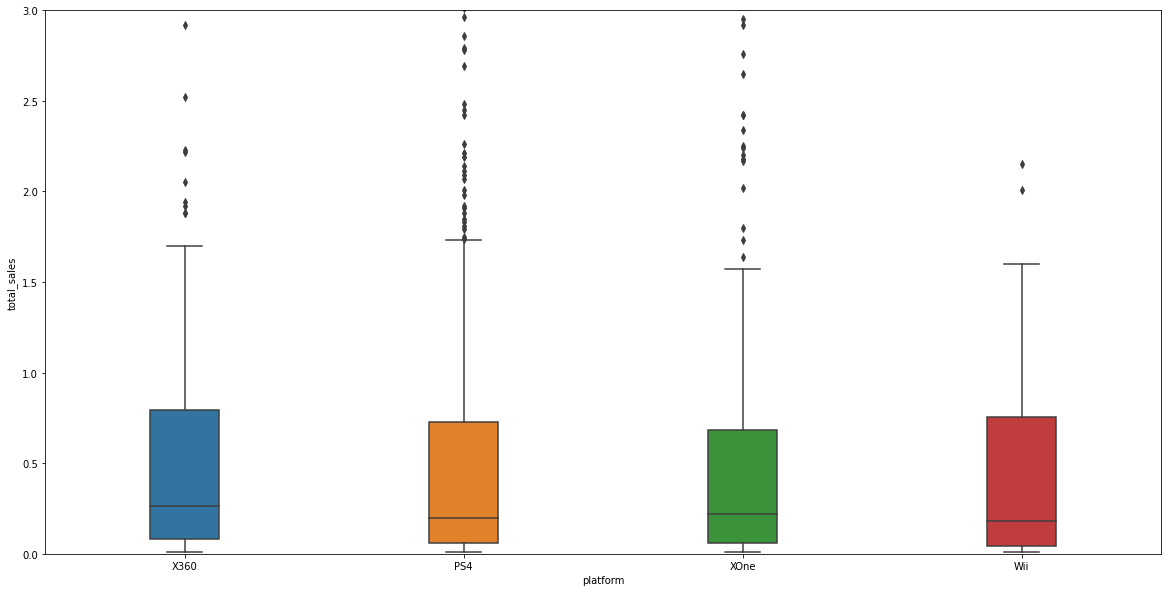

In [49]:
profitable_platforms = games_in_period.loc[(games_in_period['platform'] == 'PS4') | (games_in_period['platform'] == 'XOne')| (games_in_period['platform'] == 'X360') | (games_in_period['platform'] == 'Wii')]

plt.figure(figsize=(20,10))
sns.boxplot(x = 'platform', y = 'total_sales',data = profitable_platforms, width = 0.25)
plt.ylim(0,3)
plt.show()

The graphs show that the difference in game sales for each platform strongly depends on the platform - on some platforms this spread is huge, such as GB (from 0.25 to 2.25 million) or GEN (from 0.1 to 1.4 million), and on some platforms, such as SCD, NES and PCFX, it is completely small. 
Also can see that the median for sales on different platforms is also quite different - from 0.1 to 0.8 million.
If look at the spread of sales in the previously selected platforms X360, PS4, XOne and Wii, they are almost identical. 
The median is about 0.2 million. The revenue of X360 and PS4  does not exceed 1.75 million and the revenue of XOne and Wii  does not exceed 1.55 million.

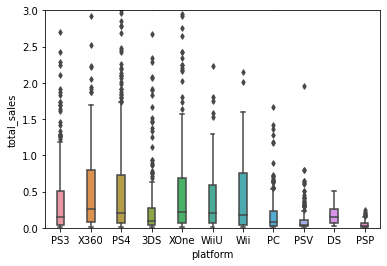

In [50]:
platforms_boxplot1 = sns.boxplot(x = 'platform',
                                y = 'total_sales',
                                data = games_in_period,
                                fliersize = 4,
                                width = 0.25)
plt.ylim(0,3)
plt.show()

- *Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.*
- *Keeping your conclusions in mind, compare the sales of the same games on other platforms.*



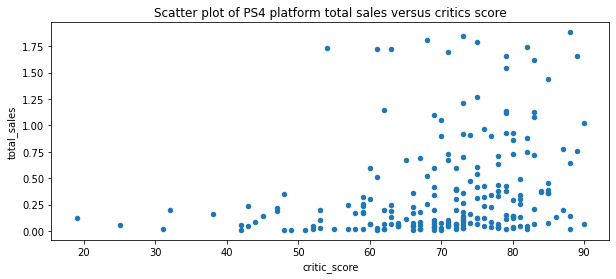

In [51]:
games.query('platform=="PS4" and total_sales<=1.9').sort_values(by='critic_score',ascending=True).plot(kind='scatter',x='critic_score',y='total_sales',figsize=(10,4),
title='Scatter plot of PS4 platform total sales versus critics score')
plt.show()


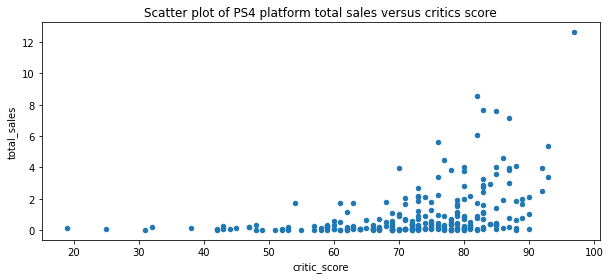

In [52]:
games.query('platform=="PS4" and user_score<=50').sort_values(by='user_score',ascending=True).plot(kind='scatter',x='critic_score',y='total_sales',figsize=(10,4),
title='Scatter plot of PS4 platform total sales versus critics score')
plt.show()

In [53]:
print('Correlation between user score and PS4 sales:')
games_in_period.loc[games_in_period['platform'] == 'PS4']['total_sales'].corr(games_in_period.loc[games_in_period['platform'] == 'PS4']['user_score'])


Correlation between user score and PS4 sales:


-0.031957110204556424

In [54]:
print('Correlation between critical score and PS4 sales:')
games_in_period.loc[games_in_period['platform'] == 'PS4']['total_sales'].corr(games_in_period.loc[games_in_period['platform'] == 'PS4']['critic_score'])


Correlation between critical score and PS4 sales:


0.406567902061781

In [55]:
print('Correlation between user score and sales regardless of platform:')
games_in_period['total_sales'].corr(games_in_period['user_score'])

Correlation between user score and sales regardless of platform:


-0.0026078133545982727

In [56]:
print('Correlation between critical score and sales regardless of platform:')
games_in_period['total_sales'].corr(games_in_period['critic_score'])

Correlation between critical score and sales regardless of platform:


0.3136995151027369

The scatter plot and the correlation figures show that there is little or no correlation between sales and user reviews. But the relationship between sales and critical reviews is quite strong and stable (the correlation is about 0.4 for popular platforms and about 0.3 for all platforms).




*Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?*



In [57]:
genre_list = games_in_period['genre'].unique()
for i in genre_list: 
    print('Profit in {} genre:'.format(i), games.query('genre == @i')['total_sales'].sum().round().astype('int'))

Profit in Action genre: 1647
Profit in Shooter genre: 976
Profit in Role-Playing genre: 896
Profit in Misc genre: 777
Profit in Sports genre: 1267
Profit in Fighting genre: 411
Profit in Racing genre: 695
Profit in Simulation genre: 382
Profit in Platform genre: 641
Profit in Strategy genre: 170
Profit in Adventure genre: 214
Profit in Puzzle genre: 160


The distribution shows how much income the games bring. The former include Action - 1647, Sports - 1267 and Shooter - 976. The last places are occupied by Puzzle - 160, Strategy - 170 and Adventure - 214

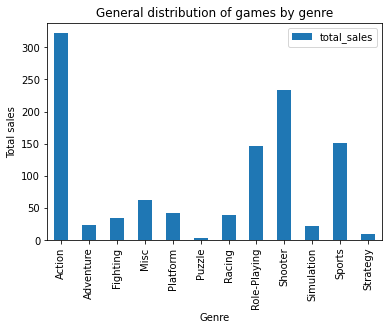

In [58]:
genres_popularity = games_in_period.groupby(['genre'])['total_sales'].sum().plot(kind = 'bar')
plt.xlabel('Genre')
plt.ylabel('Total sales')
plt.title('General distribution of games by genre')
plt.legend()
plt.show ()
#In this distribution, there are also 3 leading genres, only Sports and Shooter have changed places. 
#Sample for the period from 2013 to 2016

### Conclusion

- Analyzed how many games were released in different years.
- Analyzed how sales changed from platform to platform.Was selected the platforms with the highest total sales (PS2, X360, PS3, Wii, DS, PS) and plotted their profitability distributions over the years. Analyzed how long it usually takes for new platforms to appear and old ones to disappear (after 1-2 years they become popular, peak popularity is 3-5 years of life and the average life cycle is about 10 years). In about 5-6 years, new platforms come out.
- Was determined period you should take data to build a prognosis for 2017 (this is the period from 2013 to 2016). By 2014-2015, most of the platforms are already approaching the logical end of their life cycle, except for two platforms: PS4 and XOne, and in 2017-2019 you can count on their potential profitability.
- A box plot was built for the global sales of all games, broken down by platform. The graphs show that the difference in game sales for each platform strongly depends on the platform - on some platforms this spread is huge, such as GB (from 0.25 to 2.25 million) or GEN (from 0.1 to 1.4 million), and on some platforms, such as SCD, NES and PCFX, it is completely small. Also can see that the median for sales on different platforms is also quite different - from 0.1 to 0.8 million. If look at the spread of sales in the previously selected platforms PS4 and XOne, they are almost identical. The median is about 0.2 million, and most of the revenue per game does not exceed 1.75 million.
- For the PS4 platform, correlations were made between sales and user ratings, and between sales and critics' ratings, and a scatter plot was built. It was concluded that the relationship between sales and reviews of critics is also quite strong (correlation of about 0.4 for the three forums under consideration and 0.3 for all the others).
- Was looked at the general distribution of games by genre. In terms of total sales, the Action genre stands out sharply, followed by Sports and Shooter. The most unprofitable genres are Puzzle and Strategy.


## Create a user profile for each region.

***For each region (NA, EU, JP), determine:***


- *The top five platforms. Describe variations in their market shares from region to region.*
- *The top five genres. Explain the difference.*


In [59]:
def filter(index, values): 
    print('Top 5 {}s in the {}:'.format(index, values))
    print(games_in_period.pivot_table(index = index, values = values, aggfunc = 'sum').sort_values(values , ascending = False).head())
    print()
    
    
filter('platform', 'na_sales')
filter('platform', 'eu_sales')
filter('platform', 'jp_sales')

Top 5 platforms in the na_sales:
          na_sales
platform          
PS4         108.74
XOne         93.12
X360         81.66
PS3          63.50
3DS          38.20

Top 5 platforms in the eu_sales:
          eu_sales
platform          
PS4         141.09
PS3          67.81
XOne         51.59
X360         42.52
3DS          30.96

Top 5 platforms in the jp_sales:
          jp_sales
platform          
3DS          67.81
PS3          23.35
PSV          18.59
PS4          15.96
WiiU         10.88



In all three regions, the PS4 and PS3 platforms are leading. 
PS4 and XOne dominate in North America. PS4 and PS3 dominate in  Europe, while 3DS in first place in Japan.

In [60]:
filter('genre', 'na_sales')
filter('genre', 'eu_sales')
filter('genre', 'jp_sales')

Top 5 genres in the na_sales:
              na_sales
genre                 
Action          126.05
Shooter         109.74
Sports           65.27
Role-Playing     46.40
Misc             27.49

Top 5 genres in the eu_sales:
              eu_sales
genre                 
Action          118.13
Shooter          87.86
Sports           60.52
Role-Playing     36.97
Racing           20.19

Top 5 genres in the jp_sales:
              jp_sales
genre                 
Role-Playing     51.04
Action           40.49
Misc              9.20
Fighting          7.65
Shooter           6.61



In Japan, the Role-Playing genre is in first place. In other regions, Action takes the first place.

*Do ESRB ratings affect sales in individual regions?*

- E - Everyone      
- T - Teen       
- M - Mature       
- E10+ - Everyone 10+   
- EC - Early Childhood               
- AO - Adults Only          
- RP - Rating Pending          

In [61]:
esrb_in_na = games_in_period.groupby(['rating'])['na_sales'].agg([sum, lambda x: sum(x)/len(x)])
esrb_in_na.columns = ['total_sum', 'sum per game']
esrb_in_na

,total_sum,sum per game
rating,,
E,79.05,0.261755
E10+,54.24,0.215238
M,165.21,0.447724
T,49.79,0.149520
unknown,89.42,0.091525


The best-selling games in North America are Mature (M), Unknown and Everyone.

In [62]:
esrb_in_ea = games_in_period.groupby(['rating'])['eu_sales'].agg([sum, lambda x: sum(x)/len(x)])
esrb_in_ea.columns = ['total_sum', 'sum per game']
esrb_in_ea

,total_sum,sum per game
rating,,
E,83.36,0.276026
E10+,42.69,0.169405
M,145.32,0.393821
T,41.95,0.125976
unknown,78.91,0.080768


In Europe, the best-selling games are also in the category Mature (M), Everyone (E) and Unknown

In [63]:
esrb_in_jp = games_in_period.groupby(['rating'])['jp_sales'].agg([sum, lambda x: sum(x)/len(x)])
esrb_in_jp.columns = ['total_sum', 'sum per game']
esrb_in_jp
    

,total_sum,sum per game
rating,,
E,15.14,0.050132
E10+,5.89,0.023373
M,14.11,0.038238
T,20.59,0.061832
unknown,85.05,0.087052


 In Japan, the best-selling games are in the category Unknown,Teen (T) and Everyone (E), but sales are already lower than in North America and Europe.

### Conclusion

- The top five platforms were reviewed. In all three regions, the PS4 and PS3 platforms are leading. PS4 and XOne dominate in North America. PS4 and PS3 dominate in Europe, while 3DS in first place in Japan.
- The top five genres were reviewed. In North America and Europe, the Action genre is in the first place. In Japan, the genre of Role-Playing games is on the first place.
- The question was considered whether ESRB ratings affect sales in individual regions. In all three regions, the leading categories are Mature (M), Everyone (E) and Unknown.



## Test the following hypotheses.

***Average user ratings of the Xbox One and PC platforms are the same.***

**Null Hypothesis:** 
The average user ratings of the Xbox One and PC platforms are the same.

**Alternative hypothesis:**
The average user ratings of the Xbox One and PC platforms are **not** the same. 

In [64]:
data1 = games_in_period.loc[games_in_period['platform']=='XOne', 'user_score'].dropna()
data2 = games_in_period.loc[games_in_period['platform']=='PC', 'user_score'].dropna()
alpha = 0.05

results = st.ttest_ind(
    data1,
    data2,
    equal_var = False)

print('p-value:', results.pvalue)

if np.all(results.pvalue < alpha):
    print('We reject the null hypothesis')
else:
    print("We can't reject the null hypothesis")
    

p-value: 0.14759594013430463
We can't reject the null hypothesis


In [65]:
games_in_period.loc[games_in_period['platform']=='XB']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales


In [66]:
games_in_period.loc[games_in_period['platform']=='XOne']


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,unknown,7.39
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
179,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26
242,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49
270,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88.0,6.2,M,4.22
...,...,...,...,...,...,...,...,...,...,...,...,...
16630,Sébastien Loeb Rally Evo,XOne,2016,Racing,0.00,0.01,0.00,0.00,63.0,8.2,E,0.01
16643,Rugby Challenge 3,XOne,2016,Sports,0.00,0.01,0.00,0.00,NaN,6.6,E,0.01
16645,ZombiU,XOne,2016,Action,0.00,0.01,0.00,0.00,NaN,NaN,unknown,0.01
16660,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74.0,6.7,unknown,0.01


***Average user ratings for the Action and Sports genres are different.***

**Null Hypothesis:** 
Average user ratings for the Action and Sports genres are the same.

**Alternative hypothesis:**
Average user ratings for the Action and Sports genres are different.

In [67]:
data3 = games_in_period.loc[games_in_period['genre']=='Action', 'user_score'].dropna()
data4 = games_in_period.loc[games_in_period['genre']=='Sports', 'user_score'].dropna()
alpha = 0.05

results = st.ttest_ind(
    data3,
    data4,
    equal_var = False)

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print('We reject the null hypothesis')
else:
    print("We can't reject the null hypothesis")

p-value: 1.4460039700704315e-20
We reject the null hypothesis


### Conclusion

-  We can't reject the null hypothesis, so we cannot say that the average user ratings of the Xbox One and PC platforms are not the same.
- We can't reject the null hypothesis, so we cannot say that the average user ratings for the Action and Sports genres are different.

## Write an overall conclusion.

### Conclusion

In steps 1-2, were acquainted with the data and prepared it for further analysis:
- Column names have been replaced (make them lowercase).
- Columns 'year_of_release' and 'user_score' have been converted to the required types ('year_of_release' from float to Int and 'user_score' from object to float).
- Removed missing values in the 'name' column. It was only 2 games released in 1993.
- Removed missing values in the 'year_of_release' column. It was 1.61% of the total date, which is not critical.
- Replaced 'tbd' with nan.
- Created column 'total_sales' with the sum of sales in all regions.
 
Step 3 covered:
- Analyzed how many games were released in different years.
- Analyzed how sales changed from platform to platform.Was selected the platforms with the highest total sales (PS2, X360, PS3, Wii, DS, PS) and plotted their profitability distributions over the years. Analyzed how long it usually takes for new platforms to appear and old ones to disappear (after 1-2 years they become popular, peak popularity is 3-5 years of life and the average life cycle is about 10 years). In about 5-6 years, new platforms come out.
- Was determined period you should take data to build a prognosis for 2017 (this is the period from 2013 to 2016). By 2014-2015, most of the platforms are already approaching the logical end of their life cycle, except for two platforms: PS4 and XOne, and in 2017-2019 you can count on their potential profitability.
- A box plot was built for the global sales of all games, broken down by platform. The graphs show that the difference in game sales for each platform strongly depends on the platform - on some platforms this spread is huge, such as GB (from 0.25 to 2.25 million) or GEN (from 0.1 to 1.4 million), and on some platforms, such as SCD, NES and PCFX, it is completely small. Also can see that the median for sales on different platforms is also quite different - from 0.1 to 0.8 million. If look at the spread of sales in the previously selected platforms PS4 and XOne, they are almost identical. The median is about 0.2 million, and most of the revenue per game does not exceed 1.75 million.
- For the PS4 platform, correlations were made between sales and user ratings, and between sales and critics' ratings, and a scatter plot was built. It was concluded that the relationship between sales and reviews of critics is also quite strong (correlation of about 0.4 for the three forums under consideration and 0.3 for all the others).
- Was looked at the general distribution of games by genre. In terms of total sales, the Action genre stands out sharply, followed by Sports and Shooter. The most unprofitable genres are Puzzle and Strategy.

Step 4 covers each region (NA, EU, JP):
- The top five platforms were reviewed. In all three regions, the PS3 and PS2 platforms are leading. X360 and Wii dominate in North America and Europe, while DS and PS are popular in Japan.
- The top five genres were reviewed. In North America and Europe, the Action genre is in the first place. In Japan, the genre of Role-Playing games is on the first place.
- The question was considered whether ESRB ratings affect sales in individual regions. Everyone (E), Teen (T), and Mature (M) has been found to be the best-selling games in North America, Europe and Japan.

Step 5 the following hypotheses were tested:
- Average user ratings of the Xbox One and PC platforms are the same.
- Average user ratings for the Action and Sports genres are different.

Based on this data, can place bets on potentially popular products and plan advertising campaigns for the future.
